In [515]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

rnd.seed(10) # set a random seed

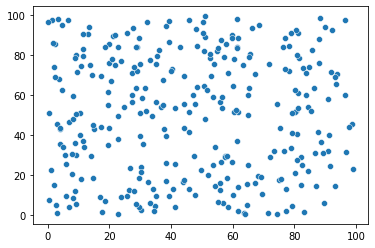

In [516]:
n = 300 # number of points
XY = rnd.random_sample((n,2)) # Matriz de n linhas e 2 colunas
XY = XY *100 # expandindo 0;1 -> 0 ; 100
#print(XY)
ax = sns.scatterplot(x=XY[:,0], y=XY[:,1])

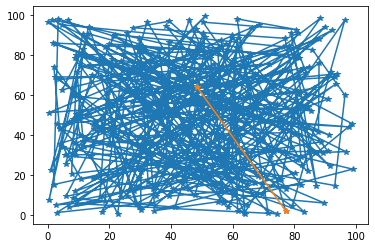

In [517]:
plt.plot(XY[:,0], XY[:,1],"-*") # Plot as linhas
plt.plot( [XY[0,0],XY[n-1,0]] ,[XY[0,1],XY[n-1,1] ], "-*") # fecha o circuito

In [518]:
disMatrix = np.empty((n,n))
for i in range(n):
  disMatrix[i][i] = np.nan
  for j in range(i+1,n):
    disMatrix[i][j] = np.sqrt( (XY[i][0] - XY[j][0])**2 + (XY[i][1] - XY[j][1])**2 ) # distancia Euclidiana
    disMatrix[j][i] = disMatrix[i][j] # matriz simétrica

#print(disMatrix)

In [519]:
def ofTSP(dist, solution):
  #print(solution)  # {0,1,3,2,4}
  value = 0
  for i in range(len(solution)-1):
    value = value + dist[solution[i]][solution[i+1]] 
    #print("i",i,"Sol[i]",solution[i]," Dist:",dist[solution[i]][solution[i+1]])

  value = value + dist[solution[len(solution)-1]][0]
  return value

#valorDaSolucao = ofTSP(disMatrix, [0,3,2,1,4])
#valorDaSolucao

In [520]:
def nearestNeighbour(dist, pos):
  row, col = dist.shape
  startPoint = pos
  nextPoint = np.nanargmin(dist[:,pos], axis=0)
  return int(nextPoint)

[0, 156, 248, 143, 236, 26, 183, 152, 88, 160, 261, 29, 229, 127, 107, 205, 16, 59, 257, 39, 112, 121, 289, 278, 151, 15, 262, 116, 202, 84, 7, 126, 288, 179, 135, 277, 242, 129, 9, 38, 92, 103, 238, 52, 181, 188, 201, 1, 204, 98, 191, 175, 50, 71, 252, 30, 169, 174, 5, 217, 163, 215, 231, 171, 119, 90, 76, 244, 207, 184, 70, 86, 20, 167, 208, 101, 198, 115, 34, 22, 294, 293, 166, 114, 60, 3, 298, 200, 260, 21, 122, 105, 176, 110, 234, 269, 27, 233, 131, 23, 258, 219, 285, 290, 187, 299, 104, 170, 31, 78, 44, 68, 40, 263, 13, 222, 14, 214, 148, 72, 154, 62, 186, 203, 172, 291, 224, 54, 146, 128, 185, 65, 287, 297, 241, 155, 266, 161, 95, 61, 206, 221, 77, 145, 18, 280, 178, 282, 46, 197, 69, 228, 133, 256, 113, 246, 265, 189, 19, 292, 226, 272, 153, 51, 81, 247, 35, 271, 137, 182, 94, 17, 33, 149, 57, 32, 162, 96, 58, 63, 180, 254, 210, 274, 193, 108, 281, 250, 196, 177, 296, 270, 66, 79, 211, 73, 164, 6, 55, 49, 47, 118, 142, 12, 93, 249, 89, 11, 36, 223, 120, 239, 43, 283, 245, 24, 1

1667.4925038280196

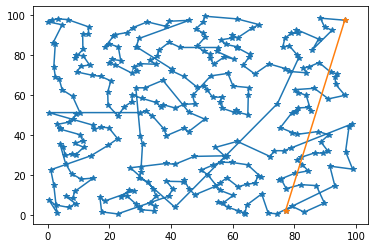

In [521]:
dd = disMatrix.copy()
pos = 0
init = 0
sequence = [init] # Solução

for i in range(n-1):
  pos_ant = pos
  pos = nearestNeighbour(dd,pos)
  sequence.append(pos) # COnstruindo a solução
  dd[:,pos_ant] = np.nan
  dd[pos_ant,:] = np.nan
  #print(sequence)
  #print(dd)

XY_opt = np.zeros((n,2))

for i in range(n):
  XY_opt[i,:] = XY[sequence[i],:]

plt.plot(XY_opt[:,0], XY_opt[:,1], "-*")
plt.plot( [XY_opt[0,0],XY_opt[n-1,0]] ,[XY_opt[0,1],XY_opt[n-1,1] ], "-*")

print(sequence)
OF = ofTSP(disMatrix, sequence)
OF

In [522]:
def printSol(sol, XY):
  XY_opt = np.zeros((n,2))
  for i in range(n):
    XY_opt[i,:] = XY[sol[i],:]
  graph = plt.plot(XY_opt[:,0], XY_opt[:,1], "-*")
  graph = plt.plot( [XY_opt[0,0],XY_opt[n-1,0]] ,[XY_opt[0,1],XY_opt[n-1,1] ], "-*")

  plt.show()

def inverte(sol, i, j):
  a = sol[i:j+1]
  if(len(a)>=2):
    for k in range(1,len(a)+1):
      sol[i+k-1] = a[-k]

def improve(sol):
  for i in range(n-2):
    for j in range(i+2,n-1):
      distOri  = disMatrix[sol[i]][sol[i+1]] + disMatrix[sol[j]][sol[j+1]]
      distSwap = disMatrix[sol[i]][sol[j]]   + disMatrix[sol[i+1]][sol[j+1]]
      if distOri > distSwap:
        inverte(sol, i+1 , j)
        printSol(sol, XY)
        print(ofTSP(disMatrix, sol))

best = ofTSP(disMatrix, sequence)
improvement = True
count =0 
while improvement:
  improve(sequence)
  ZZ = ofTSP(disMatrix, sequence)
  if ZZ >= best:
    improvement = False
  else:
    best = ZZ

size = len(sequence)

# Joguei a emenda pro meio da sequencia e rodei de novo
sequence2 = sequence[size//2:size]
sequence2.extend(sequence[0:size//2] )
print(sequence)
print(sequence2)

best = ofTSP(disMatrix, sequence2)
print(best, " sequence2")
improvement = True
count =0 
while improvement:
  improve(sequence2)
  ZZ = ofTSP(disMatrix, sequence2)
  if ZZ >= best:
    improvement = False
  else:
    best = ZZ


printSol(sequence2, XY)

print(sequence2)
OF = ofTSP(disMatrix, sequence2)
OF

Output hidden; open in https://colab.research.google.com to view.